# Ford GoBike 2019 System Data
## by Sagar Bilwal

## Investigation Overview

> The goal of this presentation is to analyze user behaviour which includes finding time of day, month or year when Ford GoBike are most in use, average distance and time for which a user uses Ford GoBike. Also through this presentation we can identify stations with highest customer to subscriber ratio which should be low. 

## Dataset Overview

> Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019.

> In this project I am exploring Ford GoBike 2019 data downloaded from https://www.lyft.com/bikes/bay-wheels/system-data 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from math import radians, sin, cos, acos
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

sb.set_style('whitegrid')
sb.set_context('talk')

In [2]:
# load in the dataset into a pandas dataframe
ford_gobike_copy_df = pd.read_csv('ford_gobike_2019_system_data_cleaned.csv')
ford_gobike_copy_df

,bike_id,bike_share_for_all_trip,end_station_id,end_station_name,start_station_id,start_station_name,user_type,start_month,start_day,start_hour,end_month,end_day,end_hour,duration_min,distance_miles
0,5114,No,146.0,30th St at San Jose Ave,34.0,Father Alfred E Boeddeker Park,Subscriber,Jan,Thu,23,Feb,Fri,0,19.800000,2.938902
1,3967,No,314.0,Santa Clara St at Almaden Blvd,318.0,San Carlos St at Market St,Subscriber,Jan,Thu,23,Feb,Fri,0,20.900000,0.396935
2,1976,No,129.0,Harrison St at 20th St,223.0,16th St Mission BART Station 2,Subscriber,Jan,Thu,23,Feb,Fri,0,5.383333,0.579915
3,3826,No,292.0,Empire St at 1st St,378.0,Empire St at 7th St,Subscriber,Jan,Thu,23,Feb,Fri,0,38.600000,0.392181
4,4642,No,256.0,Hearst Ave at Euclid Ave,266.0,Parker St at Fulton St,Subscriber,Jan,Thu,23,Feb,Fri,0,7.216667,0.903898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2217813,495,Yes,365.0,Turk St at Fillmore St,86.0,Market St at Dolores St,Subscriber,Nov,Fri,0,Nov,Fri,0,7.983333,0.819240
2217814,1420,No,345.0,Hubbell St at 16th St,114.0,Rhode Island St at 17th St,Customer,Nov,Fri,0,Nov,Fri,0,2.683333,0.272223
2217815,2997,No,235.0,Union St at 10th St,160.0,West Oakland BART Station,Subscriber,Nov,Fri,0,Nov,Fri,0,3.000000,0.326591
2217816,204,No,38.0,The Embarcadero at Pier 38,465.0,San Francisco Caltrain Station (King St at 4th...,Subscriber,Nov,Fri,0,Nov,Fri,0,4.366667,0.578330


## Distribution of total distance travelled by the users using Ford GoBike

> Almost 99.9% of user travel distance less than 4.5 miles using Ford GoBike. 55k user have total distance equal to 0 as the did a round trip using the Ford GoBike. The distance travelled is a crow's distance hence might be slightly less than the actual distance.

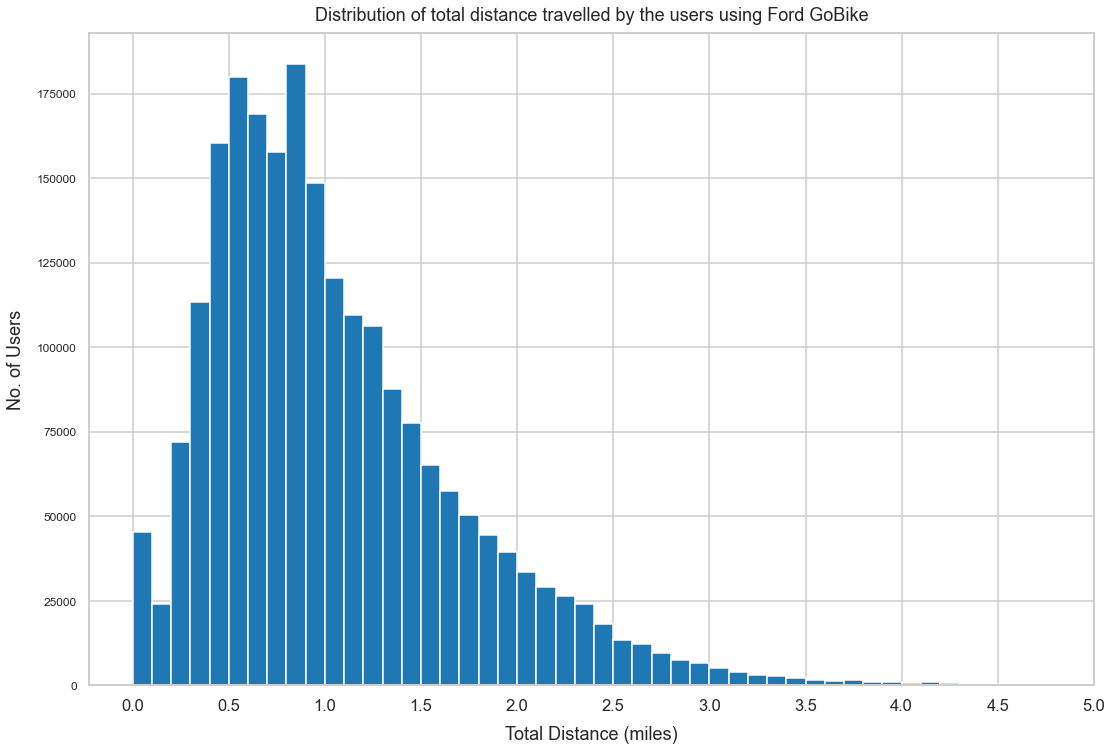

In [3]:
plt.figure(figsize = [18,12])
bin_edges = np.arange(0,ford_gobike_copy_df.distance_miles.max()+0.1,0.1)
plt.hist(data = ford_gobike_copy_df, x= 'distance_miles',bins= bin_edges)
plt.tick_params(axis = 'y',labelsize = 12)
plt.title('Distribution of total distance travelled by the users using Ford GoBike', y = 1.01)
xtick_locs = np.arange(0,ford_gobike_copy_df.distance_miles.max()+1,0.5)
plt.xticks(xtick_locs,xtick_locs)
plt.xlabel('Total Distance (miles)', labelpad = 12)
plt.ylabel('No. of Users', labelpad = 12)
plt.show()

## Distribution of total duration of using Ford GoBike

> Almost 98% of user travel duration was less than 45 minutes. The median of the total duration for which is Ford GoBike is used is approximately 9.33 min. Most of the user use it between 2.5 min to 15 min

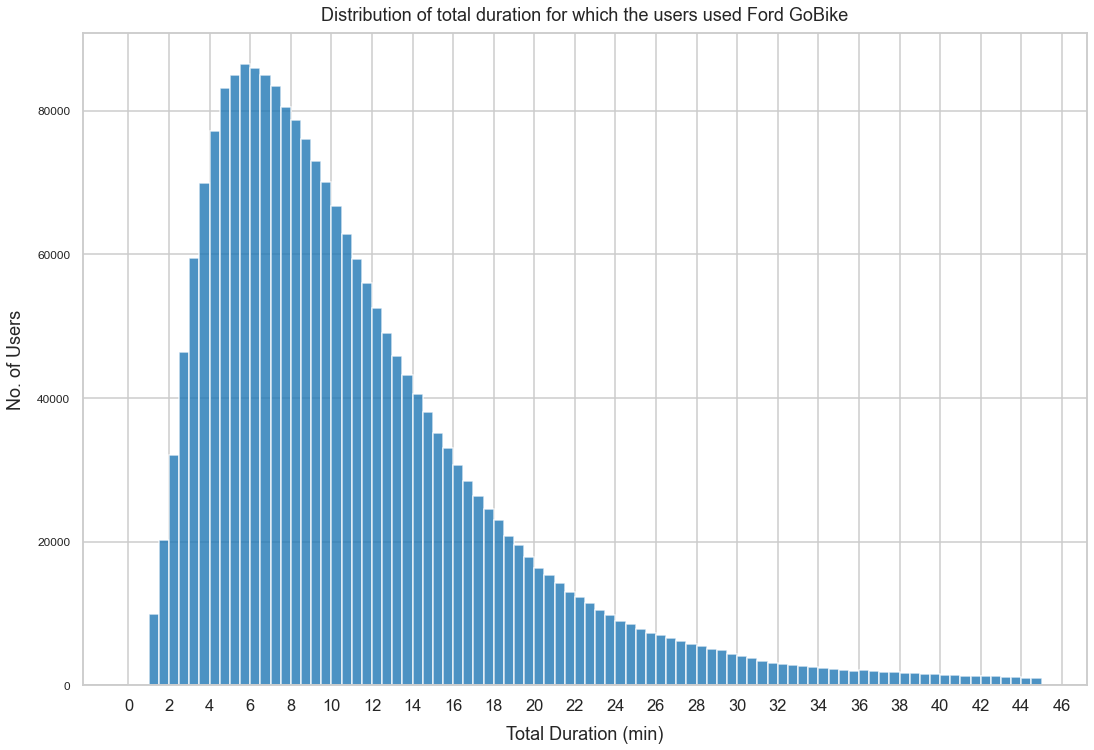

In [4]:
plt.figure(figsize = [18,12])
bin_edges = np.arange(0,ford_gobike_copy_df.duration_min.max()+0.5,0.5)
plt.hist(data = ford_gobike_copy_df, x= 'duration_min',bins= bin_edges, alpha = 0.8)
plt.tick_params(axis = 'y',labelsize = 12)
plt.title('Distribution of total duration for which the users used Ford GoBike',y = 1.01)
xtick_locs = np.arange(0,ford_gobike_copy_df.duration_min.max()+2,2)
xtick_locs=xtick_locs.astype(int)
plt.xticks(xtick_locs,xtick_locs)
plt.xlabel('Total Duration (min)', labelpad = 12)
plt.ylabel('No. of Users', labelpad = 12)
plt.show()

## Distribution of Subscribers vs Customers

> Here is the pie chart visualization of percentage of subscribers and customers of Ford GoBike in 2019

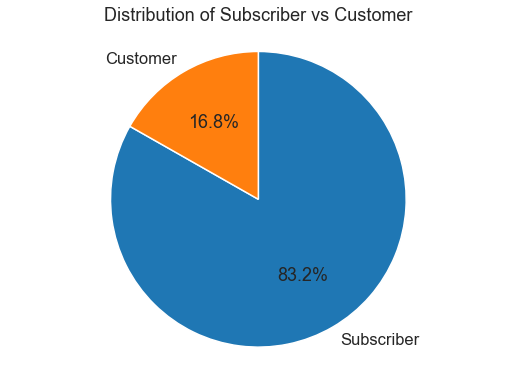

In [5]:
plt.figure(figsize = [9,6])
user_type_counts = ford_gobike_copy_df.user_type.value_counts()
subscriber_count = user_type_counts[0]
customer_count = user_type_counts[1]
total_count = subscriber_count+customer_count
plt.pie([(subscriber_count/total_count), (customer_count/total_count)], labels = user_type_counts.index, startangle =90, counterclock = False, autopct ='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Subscriber vs Customer',y = 1.03)
plt.show()

## Distribution of traffic across months, days and hours by Subscribers vs Customers

> 1) Distribution of traffic in months for subscriber and customer is similar as it first peaks in march and april and then traffic reduces in coming months but again it peaks in August to October time period. 2) There is some difference in traffic distribution in case of week as subscribers are much more during weekdays than in weekends but customers are almost same ie. around 50k during all daysof week. 3) Again in hour distribution the peaks and decline is similar for both subscriber and customer with traffic peaking 7 am to 9 am and 4 pm to 7 pm

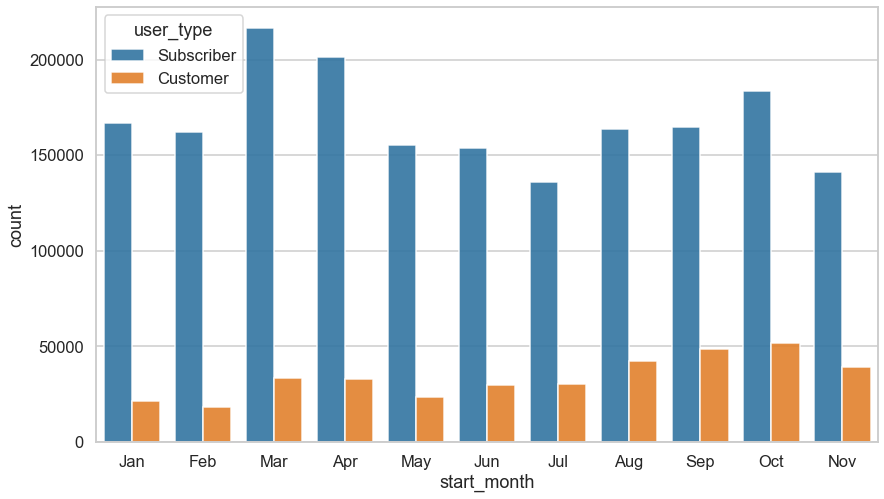

In [6]:
plt.figure(figsize = [14,8])
month_color = sb.color_palette()[0]
day_color = sb.color_palette()[1]
hour_color = sb.color_palette()[2]
# specifying order of days of week to make visualization more easily readable
days_of_week_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sb.countplot(data = ford_gobike_copy_df, x= 'start_month', hue = 'user_type', alpha = 0.9)
plt.show()

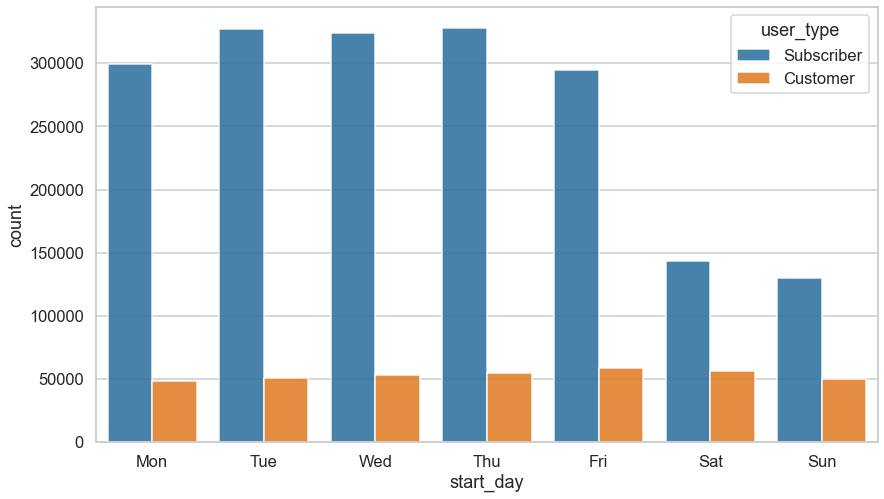

In [7]:
plt.figure(figsize = [14,8])
sb.countplot(data = ford_gobike_copy_df, x= 'start_day', hue = 'user_type', order = days_of_week_order, alpha = 0.9)
plt.show()

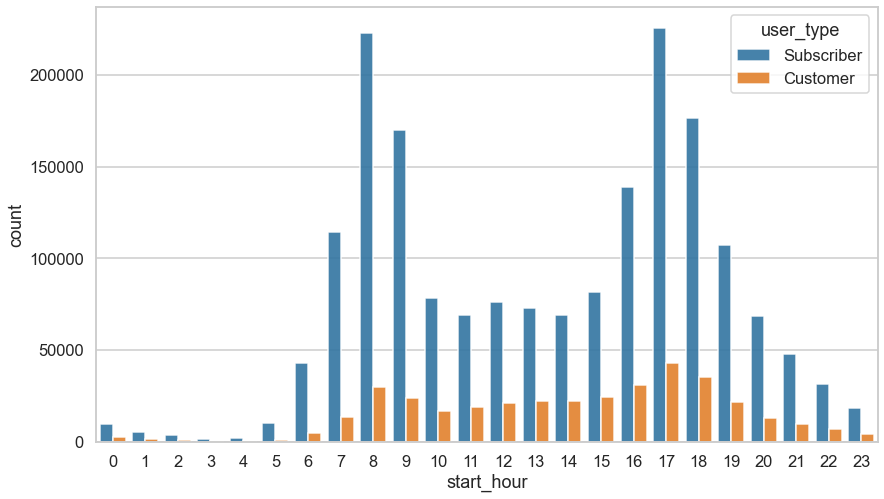

In [8]:
plt.figure(figsize = [14,8])
sb.countplot(data = ford_gobike_copy_df, x= 'start_hour', hue = 'user_type', alpha = 0.9)
plt.show()

## Top 15 stations with highest Customer to Subscriber ratio

> Newbury Park Dr at King Rd has the highest Customer to Subscriber ratio of almost 6.9 which is much higher than other station hence it should be looked into why users of the station do not subscribe

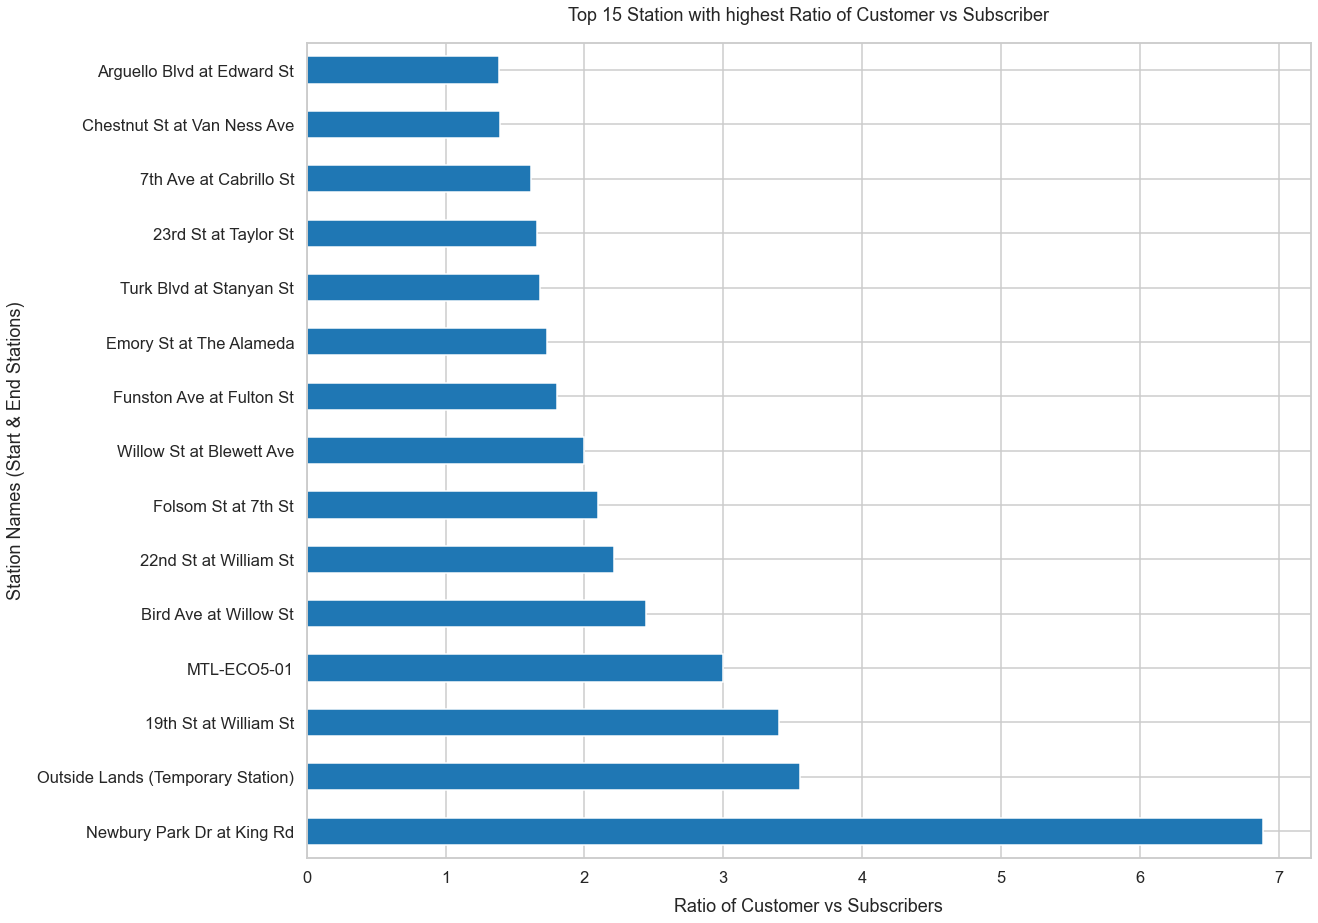

In [9]:
station_highest_cust_sub_ratio = ((ford_gobike_copy_df.query('user_type == "Customer"').start_station_name.value_counts() + ford_gobike_copy_df.query('user_type == "Customer"').end_station_name.value_counts())/(ford_gobike_copy_df.query('user_type == "Subscriber"').start_station_name.value_counts() + ford_gobike_copy_df.query('user_type == "Subscriber"').end_station_name.value_counts())).sort_values(ascending = False).iloc[:15]
plt.figure(figsize = [18,15])
station_highest_cust_sub_ratio.plot.barh()
plt.xlabel('Ratio of Customer vs Subscribers', labelpad = 12)
plt.ylabel('Station Names (Start & End Stations)', labelpad = 12)
plt.title('Top 15 Station with highest Ratio of Customer vs Subscriber', y = 1.02)
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!